<a href="https://colab.research.google.com/github/AbheyTiwari/MRI-SkinCancer-AI/blob/main/MRIML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install dependencyies
!pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python scikit-learn
!pip install keras
!pip install tensorflow
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install gradio

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", path)

100%|██████████| 786M/786M [00:13<00:00, 62.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Explicit Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Dense(9, activation='softmax')
Dense(1, activation='sigmoid')
Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3))
from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())
from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

# Define ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Train Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load Test Data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Explicit Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1,  # Adjust based on performance
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1734 - loss: 2.1890 - val_accuracy: 0.3198 - val_loss: 2.0247


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1295 - loss: 2.1743
Test Accuracy: 14.41%


In [ ]:
import pickle

# Save model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights as pickle
with open("model_weights.pkl", "wb") as weights_file:
    pickle.dump(model.get_weights(), weights_file)

print("Model architecture and weights saved successfully!")


Model architecture and weights saved successfully!


In [ ]:
from tensorflow.keras.models import model_from_json

# Load architecture
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# Load weights
with open("model_weights.pkl", "rb") as weights_file:
    model.set_weights(pickle.load(weights_file))

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
model.save("model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import pickle
from tensorflow.keras.models import model_from_json

# Load architecture
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# Load weights
with open("model_weights.pkl", "rb") as weights_file:
    model.set_weights(pickle.load(weights_file))

print("Model loaded successfully!")


Model loaded successfully!


Saving ISIC_0010512.jpg to ISIC_0010512.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


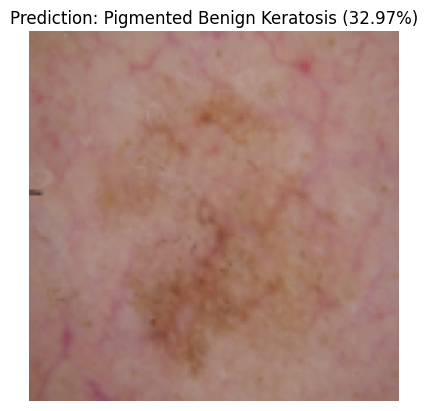

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Load your trained model
model = load_model("/content/model.h5")

# Define class labels
class_labels = [
    "Actinic Keratosis", "Basal Cell Carcinoma", "Dermatofibroma",
    "Melanoma", "Nevus", "Pigmented Benign Keratosis",
    "Seborrheic Keratosis", "Squamous Cell Carcinoma", "Vascular Lesion"
]

# Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    # Load and preprocess the image
    img = Image.open(filename).convert("RGB")
    img = img.resize((126, 126))  # Resize as per model input
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Display image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("/content/model.h5")

# Define class labels
class_labels = [
    "Actinic Keratosis", "Basal Cell Carcinoma", "Dermatofibroma",
    "Melanoma", "Nevus", "Pigmented Benign Keratosis",
    "Seborrheic Keratosis", "Squamous Cell Carcinoma", "Vascular Lesion"
]

# Function to make predictions
def predict_skin_cancer(image):
    image = image.resize((128, 128))  # Resize to match model input size
    image = np.array(image) / 255.0   # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)[0]  # Get predictions
    label = class_labels[np.argmax(prediction)]  # Get predicted class
    confidence = np.max(prediction) * 100  # Confidence score
    return f"Prediction: {label} ({confidence:.2f}%)"

# Create the Gradio app
iface = gr.Interface(
    fn=predict_skin_cancer,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Skin Cancer Detection AI",
    description="Upload an image of a skin lesion to check for possible conditions."
)

# Launch the app
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cb0daade6149d93bd3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


model 2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:01<00:00, 133MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [ ]:
import os
import glob

dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"

train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")

# Check categories
categories = os.listdir(train_dir)
print("Categories:", categories)


Categories: ['meningioma', 'notumor', 'glioma', 'pituitary']


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

IMG_SIZE = (128, 128)  # Resize images

def load_images_from_folder(folder):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign label (0-3)
        for image_path in glob.glob(category_path + "/*.jpg"):  # Adjust if needed
            img = load_img(image_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(test_dir)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")


Training Data: (5712, 128, 128, 3), Labels: (5712,)
Testing Data: (1311, 128, 128, 3), Labels: (1311,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Ensure labels are correctly shaped
y_train = tf.keras.utils.to_categorical(np.array(y_train).reshape(-1), num_classes=4)
y_test = tf.keras.utils.to_categorical(np.array(y_test).reshape(-1), num_classes=4)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

# Optimized CNN Model
model = Sequential([
    Input(shape=(128,128,3)),  # Use Input() instead of input_shape in Conv2D
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),  # More efficient than Flatten
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4-class classification
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# Train the model with data augmentation
model.fit(datagen.flow(X_train, y_train, batch_size=32, shuffle=True),
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[lr_scheduler])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.6339 - loss: 0.8818 - val_accuracy: 0.2433 - val_loss: 2.3959 - learning_rate: 0.0010
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.7501 - loss: 0.6226 - val_accuracy: 0.2387 - val_loss: 5.8772 - learning_rate: 0.0010
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7893 - loss: 0.5327
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
179/179 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.7894 - loss: 0.5327 - val_accuracy: 0.4813 - val_loss: 2.5282 - learning_rate: 0.0010
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.8417 - loss: 0.4248 - val_accuracy: 0.6110 - val_loss: 1.4163 - learning_rate: 5.0000e-04
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.8577 - loss: 0.3807 - val_accuracy: 0.6445 - val_loss: 1.2704 - learning_rate: 5.0000e-04
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.8688 - los

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


In [ ]:
import os
import glob

test_images = glob.glob("/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/*.jpg")

print("Example test image:", test_images[0])  # Print first test image path


In [ ]:
def predict_mri(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_label = categories[np.argmax(prediction)]

    print("Predicted Tumor Type:", predicted_label)

# Example: Predict a test MRI scan
predict_mri("/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0203.jpg")



In [ ]:
model.save("model.keras")  # New Keras format
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



Expected Input Shape: (128, 128)


Saving Te-glTr_0000.jpg to Te-glTr_0000 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


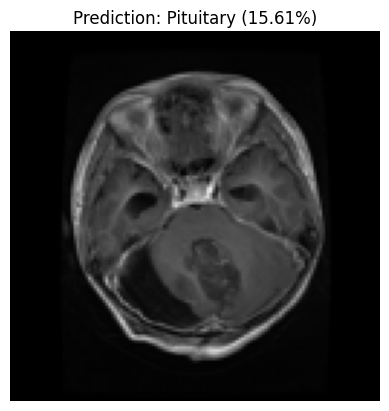

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("model.keras", compile=False)

# Get input shape of the model
input_shape = model.input_shape[1:3]  # (height, width)
print(f"Expected Input Shape: {input_shape}")

# Define class labels (Modify as per dataset)
class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Upload an image for prediction
uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess the image
    img = Image.open(filename).convert("RGB")
    img = img.resize(input_shape)  # Resize to match model input size
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Display image and prediction result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()
